## ZiP Tutorial
---

ZiP is a fast image subtraction tool.
The whole code has been condensed down into one function. (Almost) Everything can be done in one line.

---

In [1]:
from ZOGYP import run_ZOGY


run_ZOGY('test/2.fits', 'test/1.fits')

Parallell version, using 45 cores


An output directory is made, creatively called output. There are 5 file types in this folder:

* Reference image
* Aligned Science image
* D image (raw subtraction)
* S image 
* Scorr image

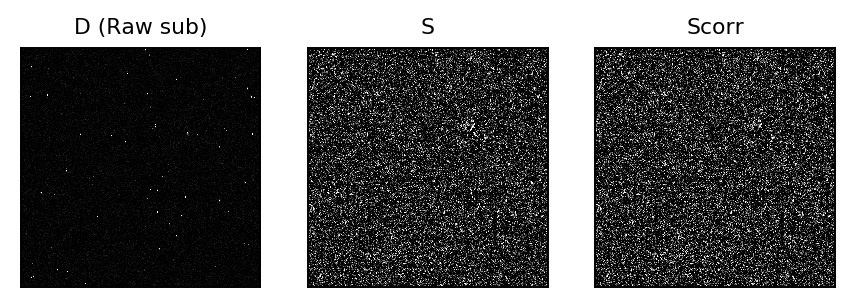

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits

dat_Scorr = fits.getdata('output/data_Scorr1.fits', ext=0)
dat_D = fits.getdata('output/data_D1.fits', ext=0)
dat_S = fits.getdata('output/data_S1.fits', ext=0)

ax1 = plt.subplot2grid((1, 3), (0, 0))
plt.imshow(dat_D, cmap = 'gray', vmin=0, vmax=500)
plt.title('D (Raw sub)', fontsize=9)
plt.setp(ax1, xticks=[], yticks=[])

ax2 = plt.subplot2grid((1, 3), (0, 1))
plt.imshow(dat_S, cmap = 'gray', vmin=0, vmax=0.035)
plt.title('S', fontsize=9)
plt.setp(ax2, xticks=[], yticks=[]) 

ax3 = plt.subplot2grid((1, 3), (0, 2))
plt.imshow(dat_Scorr, cmap = 'gray', vmin=0, vmax=0.075)
plt.title('Scorr', fontsize=9)
plt.setp(ax3, xticks=[], yticks=[])


plt.rcParams['figure.dpi'] = 175
plt.show()

---

### Extra parameters

One of the main variable parameters is the psf cleaning. This tidies up small variations in the psf model. This requires a bit of fine tuning, too little and the small variations surface as ripples. Too high and it's equivalent to not convolving with the PSF at all.

Example below:


Parallell version, using 45 cores


Parallell version, using 45 cores


Parallell version, using 45 cores


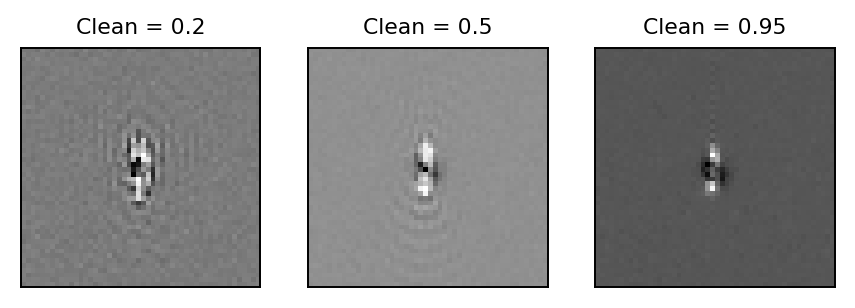

In [3]:
from ZOGYP import run_ZOGY
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata.utils import Cutout2D as cut

run_ZOGY('test/2.fits', 'test/1.fits', clean_sci = 0.2, clean_ref = 0.2)
CUT = cut(fits.getdata('output/data_D1.fits'), (863,922),(50,50))
ax1 = plt.subplot2grid((1, 3), (0, 0))
plt.imshow(CUT.data, cmap = 'gray')
plt.title('Clean = 0.2', fontsize=9)
plt.setp(ax1, xticks=[], yticks=[])

run_ZOGY('test/2.fits', 'test/1.fits', clean_sci = 0.5, clean_ref = 0.5)
CUT = cut(fits.getdata('output/data_D1.fits'), (863,922),(50,50))
ax2 = plt.subplot2grid((1, 3), (0, 1))
plt.imshow(CUT.data, cmap = 'gray')
plt.title('Clean = 0.5', fontsize=9)
plt.setp(ax2, xticks=[], yticks=[])

run_ZOGY('test/2.fits', 'test/1.fits', clean_sci = 0.95, clean_ref = 0.95)
CUT = cut(fits.getdata('output/data_D1.fits'), (863,922),(50,50))
ax3 = plt.subplot2grid((1, 3), (0, 2))
plt.imshow(CUT.data, cmap = 'gray')
plt.title('Clean = 0.95', fontsize=9)
plt.setp(ax3, xticks=[], yticks=[])

plt.rcParams['figure.dpi'] = 175
plt.show()

--- 

### Chopping the image up

There can be scenarios, when working with larger images, thats require the original image to be sliced up. The main ones being:large PSF variation across a the field, not enough memory to process the whole image at once, and speeding up the parallel program. 

Shown is an example of using the chop function:

Parallell version, using 45 cores


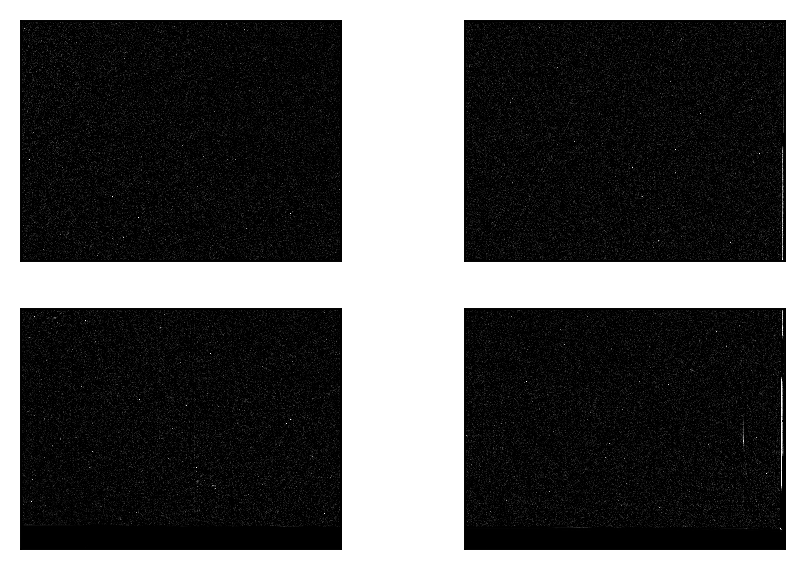

In [4]:
from ZOGYP import run_ZOGY
from astropy.io import fits
import matplotlib.pyplot as plt


run_ZOGY('t/test2_epoch_1.fits', 't/test2_ref.fits', sub_imagex = 2, sub_imagey = 2)

ax1 = plt.subplot2grid((2, 2), (0, 0))
Scorr_dat = fits.getdata('output/data_Scorr1.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax1 ,xticks=[], yticks=[])

ax2 = plt.subplot2grid((2, 2), (1, 0))
Scorr_dat = fits.getdata('output/data_Scorr2.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax2 ,xticks=[], yticks=[])

ax3 = plt.subplot2grid((2, 2), (0, 1))
Scorr_dat = fits.getdata('output/data_Scorr3.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax3 ,xticks=[], yticks=[])

ax4 = plt.subplot2grid((2, 2), (1, 1))
Scorr_dat = fits.getdata('output/data_Scorr4.fits')       
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.5)
plt.setp(ax4 ,xticks=[], yticks=[])

plt.rcParams['figure.dpi'] = 500
plt.show()

---
### Align the images

Not all images come nicely aligned. Using "align=True" will run Alipy on the two input images and align them:

Parallell version, using 45 cores


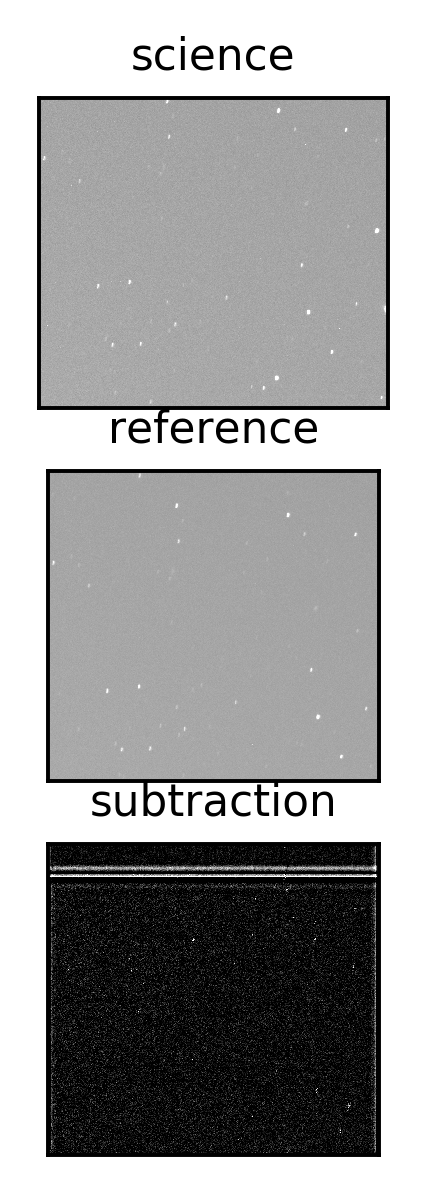

In [8]:
from ZOGYP import run_ZOGY
import matplotlib.pyplot as plt
from astropy.io import fits
run_ZOGY('test/3.fits', 'test/4.fits', align=True)

ax1 = plt.subplot2grid((3, 1), (0, 0))
Scorr_dat = fits.getdata('test/3.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0.0 , vmax=5000)
plt.title('science', fontsize=9)
plt.setp(ax1 ,xticks=[], yticks=[])

ax2 = plt.subplot2grid((3, 1), (1, 0))
Scorr_dat = fits.getdata('test/4.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0.0 , vmax=5000)
plt.title('reference', fontsize=9)
plt.setp(ax2 ,xticks=[], yticks=[])

ax3 = plt.subplot2grid((3, 1), (2, 0))
Scorr_dat = fits.getdata('output/data_D1.fits')
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0.0 , vmax=550)
plt.title('subtraction', fontsize=9)
plt.setp(ax3 ,xticks=[], yticks=[])

plt.rcParams['figure.dpi'] = 350
plt.show()

---

### Extracting source

Image subtrations primary purpose is to locate changes in the field.

A basic way to extract these sources is to run Sextractor on the Scorr image. It's crude, however will find the brightest sources:


Parallell version, using 45 cores


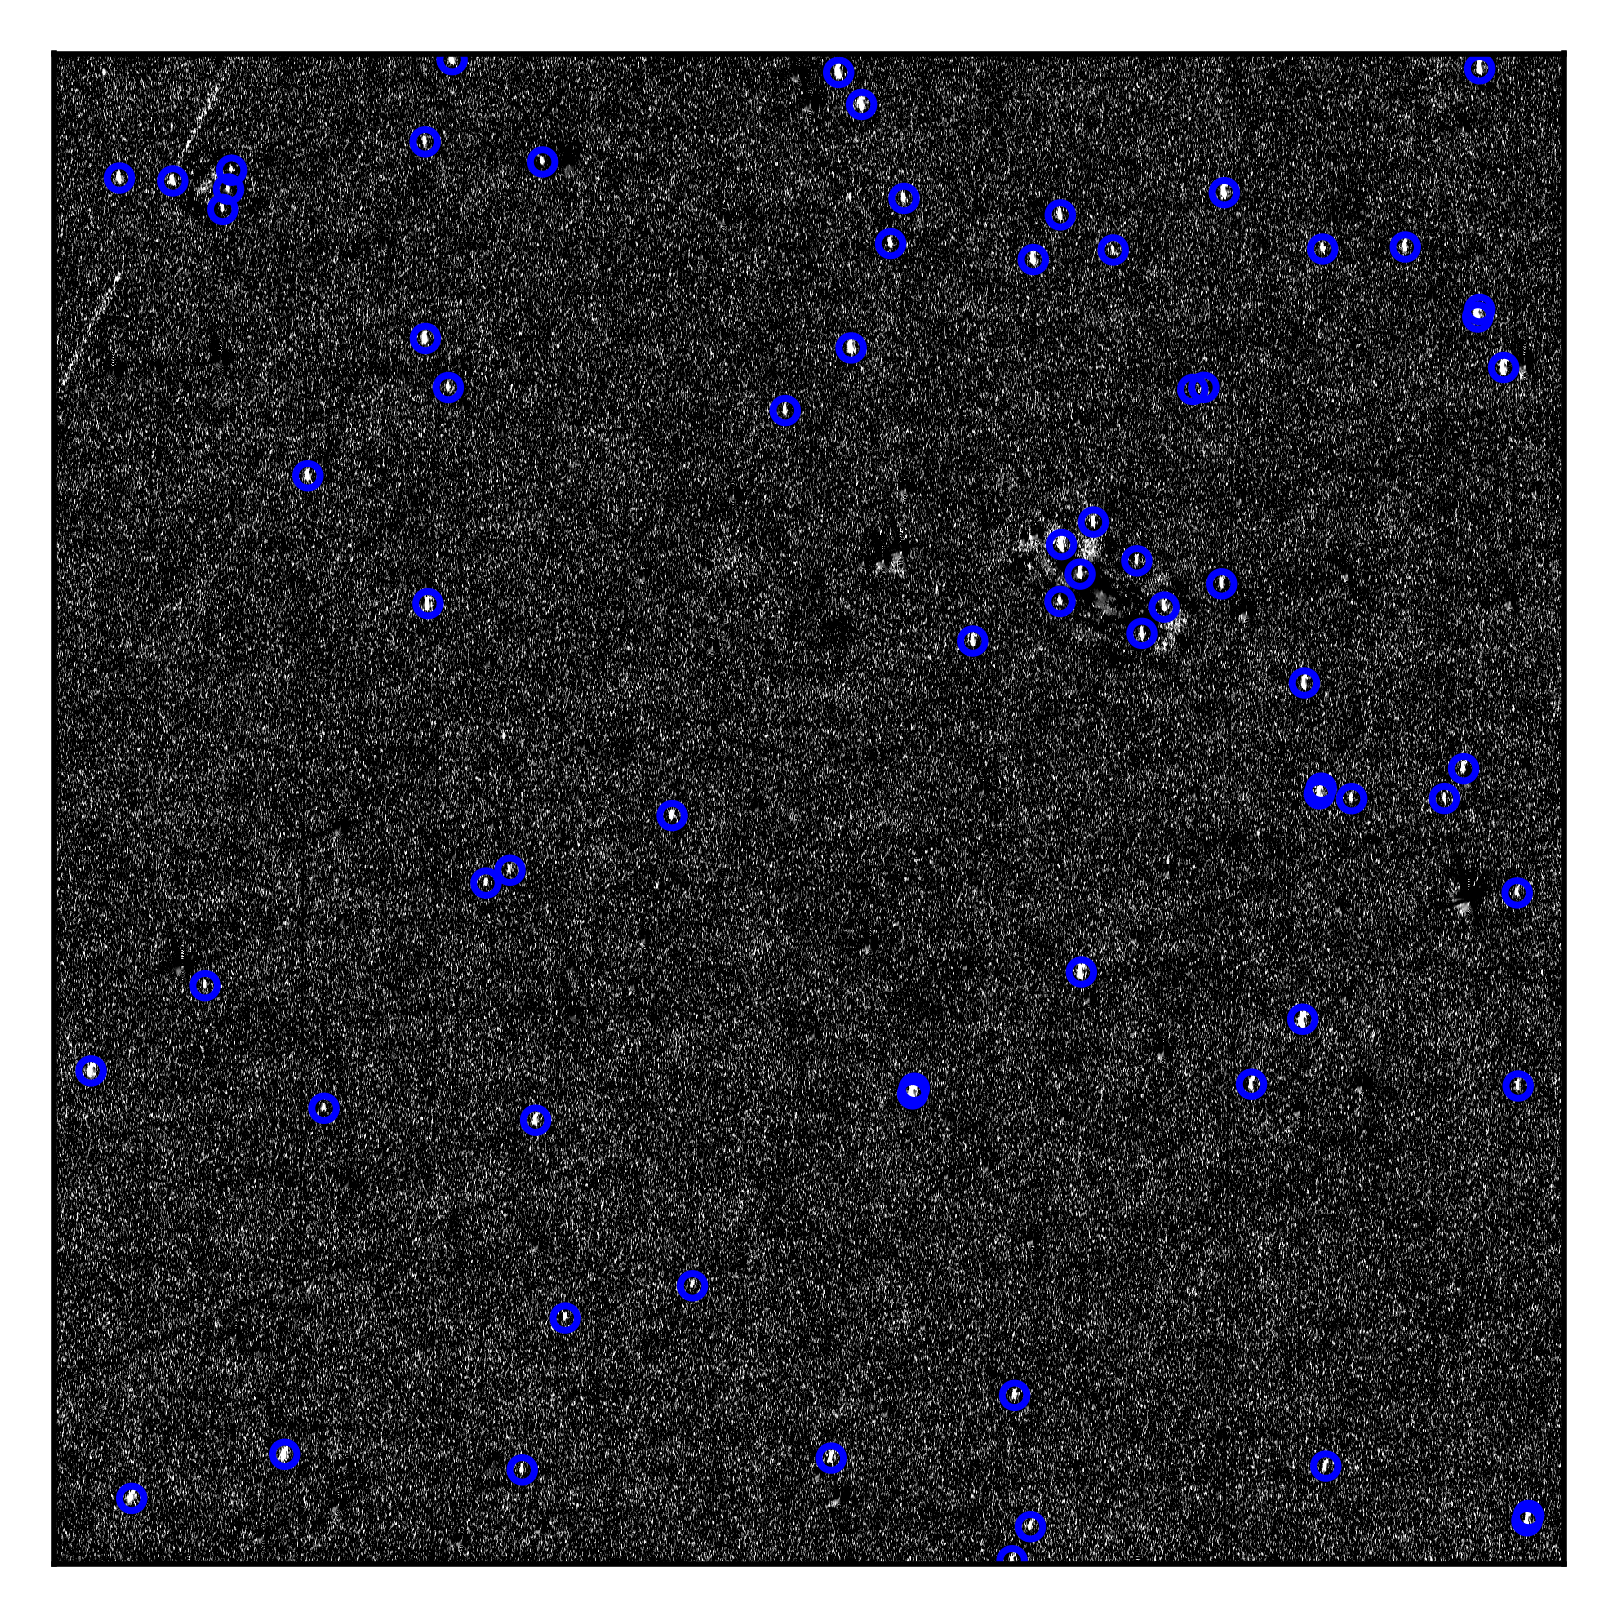

In [6]:
from ZOGYP import run_ZOGY
import subprocess
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

run_ZOGY('test/2.fits', 'test/1.fits')

Scorr = './output/data_Scorr1.fits'
Scorr_dat = (fits.getdata(Scorr))/np.amax(fits.getdata(Scorr))
subprocess.call(['sex', Scorr, '-c', './configfls/check.sex','-CATALOG_NAME',  'Scorr.cat'])
tl = open('reg.cat', 'w')
K = open('Scorr.cat', 'r')

ax1 = plt.subplot2grid((1, 1), (0, 0))
plt.imshow(Scorr_dat, cmap = 'gray', vmin=0, vmax=0.035)
for lines in K:
 SL = lines.split()
 x = SL[1]
 y = SL[2]
 tl.write('circle '+x+' '+y+' 5 \n')
 circ = plt.Circle((float(x), float(y)), 15, color='b', fill=False)
 ax1.add_artist(circ)


plt.setp(ax1 ,xticks=[], yticks=[])
plt.rcParams['figure.dpi'] = 100
plt.show()

---

### In-built extractor

The program has an it's own transient/variable extractor. This will produce a catalogue of all the changes in the field. Adding "figs=True" will also produce thumbnails of all the extracted sources and an object list containing anything within 10 arc seconds of the extracted location:

Parallell version, using 45 cores


458  sources found


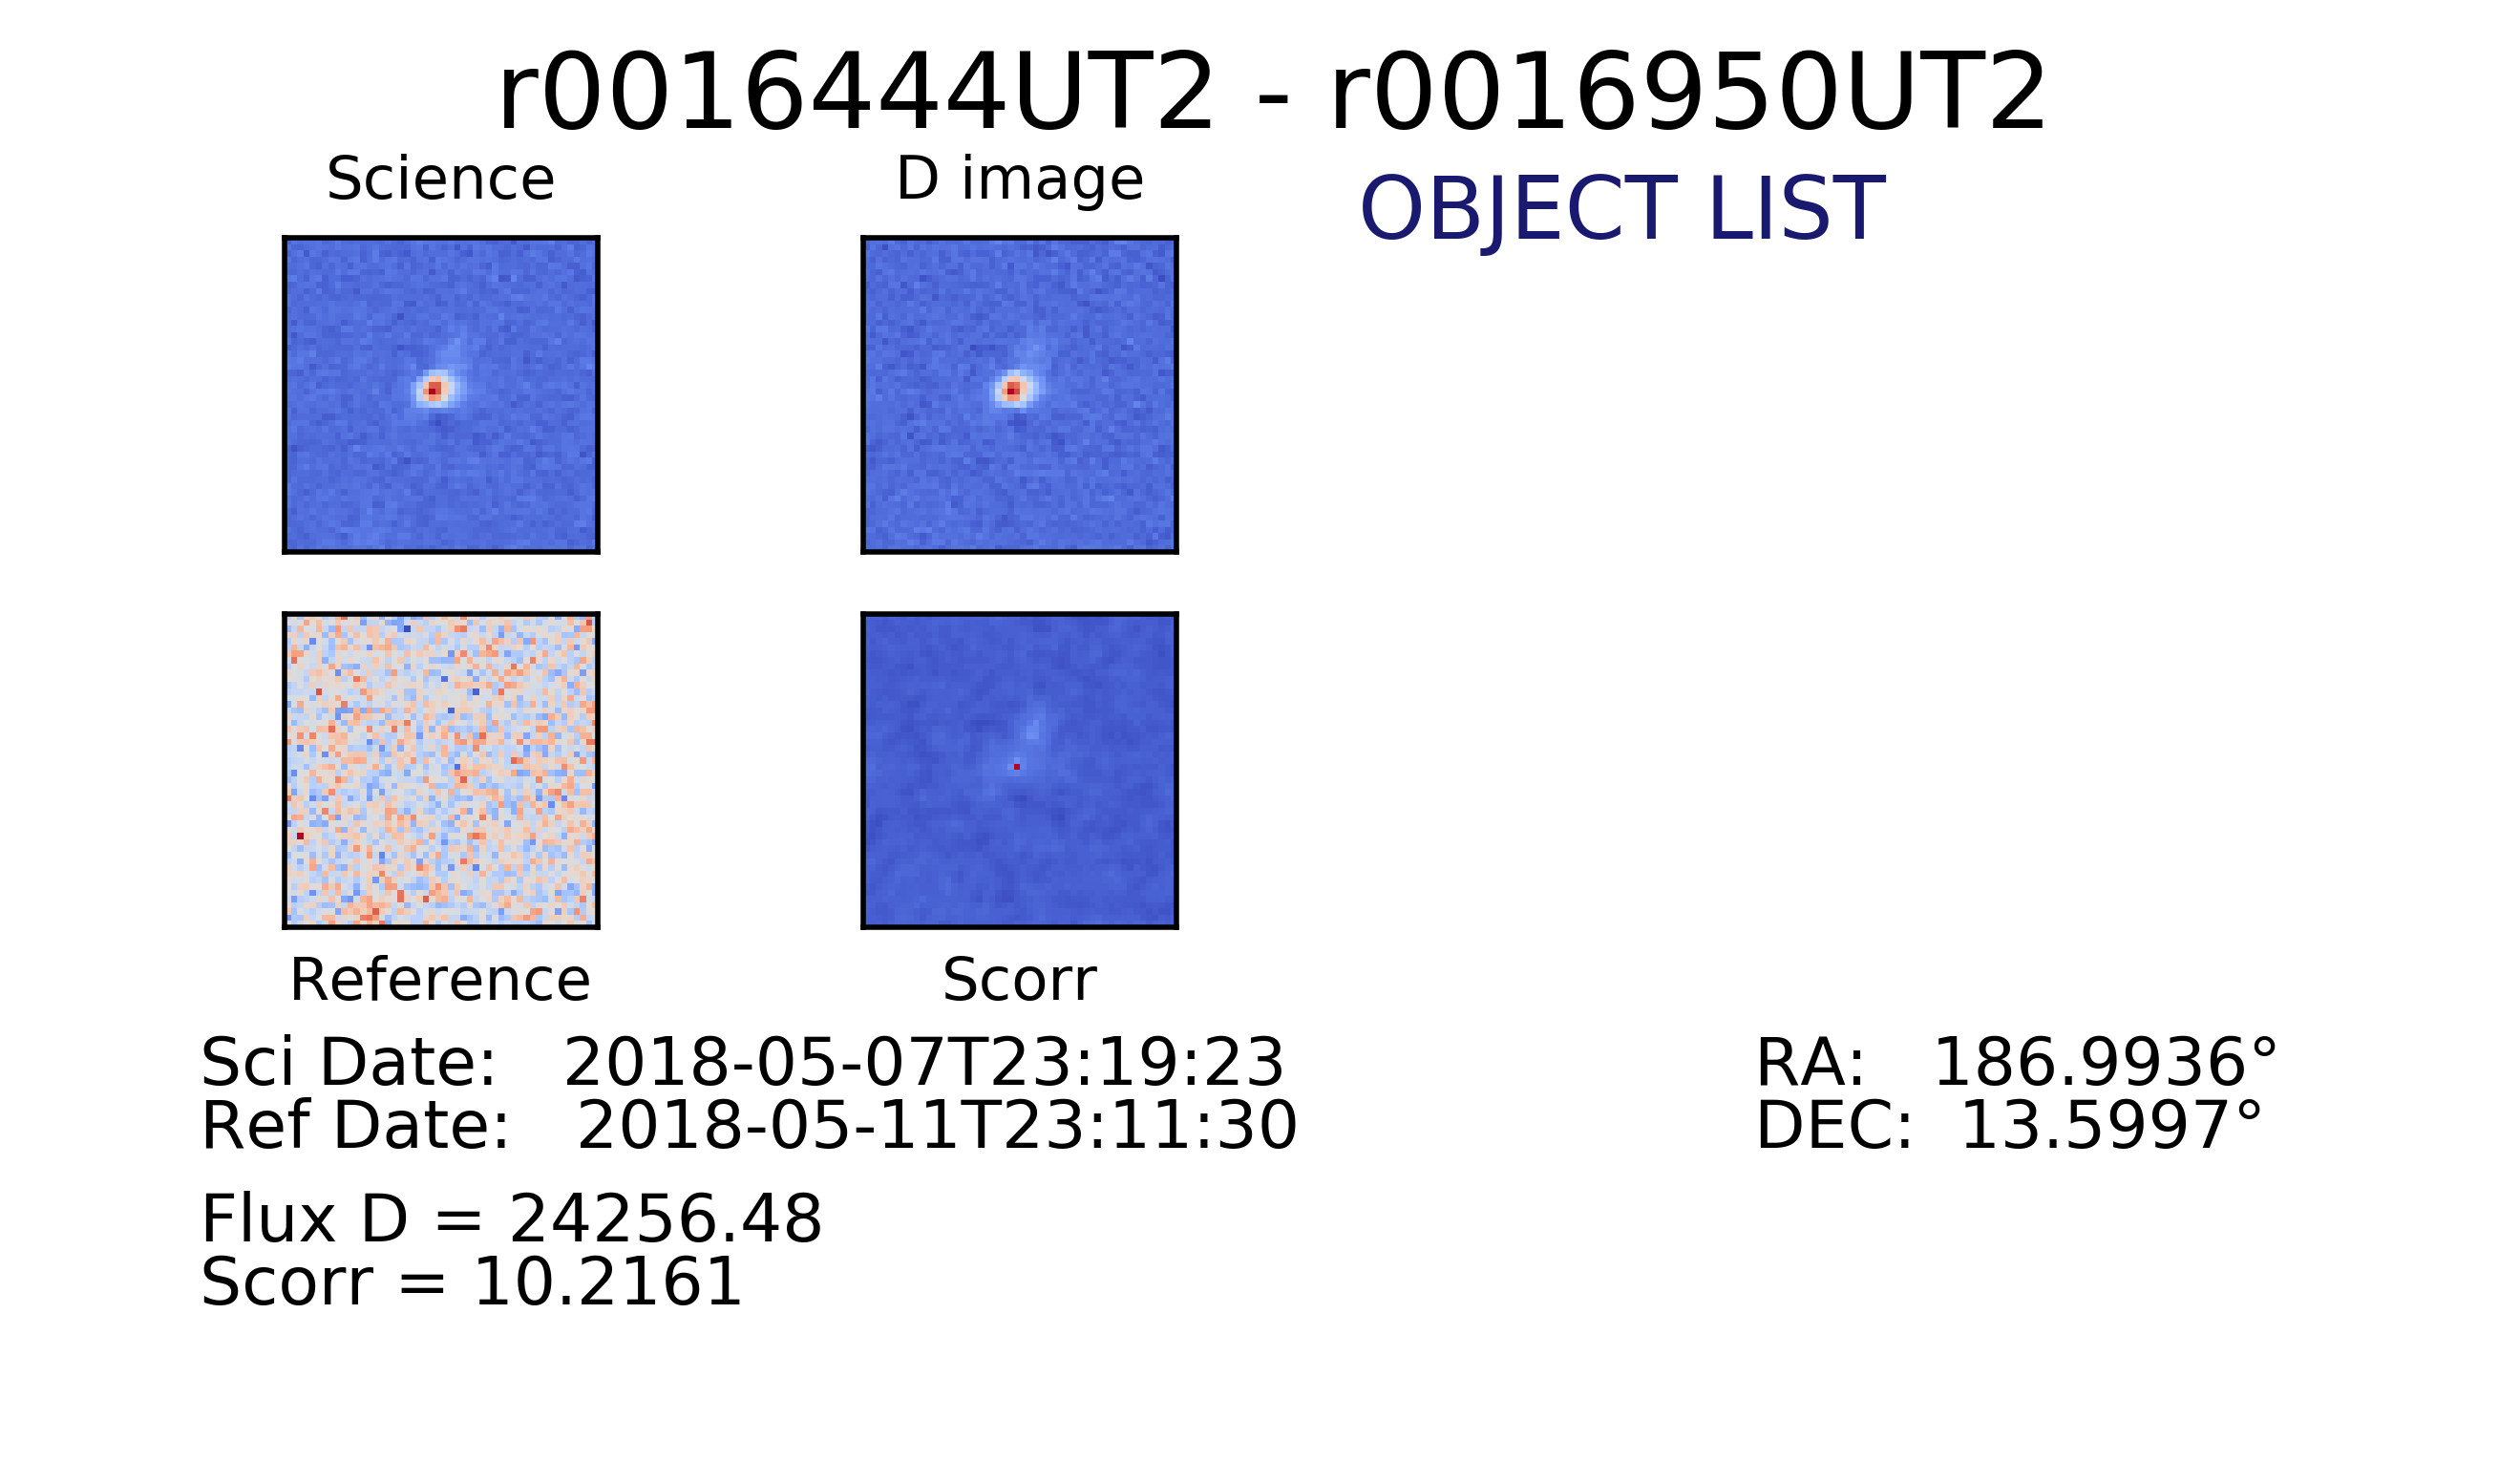

In [6]:
from ZOGYP import run_ZOGY

run_ZOGY('t/test2_epoch_5.fits', 't/test2_ref.fits', Ex = 'T', figs=True)

Above is an example of the output figure.

---

There are more ways to play around with the function, can be found [here](https://github.com/GOTO-OBS/ZiP/blob/master/tutorial/readme.md)